In [160]:
import csv
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import random as rnd
import datetime 
import re

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot

from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn import tree #Look at documentation: http://scikit-learn.org/stable/modules/tree.html
from sklearn import model_selection


from sklearn.model_selection import train_test_split # Helping you divide your datasets to train/test(validation)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
from sklearn.metrics import roc_curve
warnings.filterwarnings('ignore')

In [2]:
churn_df = pd.read_csv('customer_churn.csv')

In [3]:
churn_df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Rename the cloumns

In [5]:
churn_df.columns = ['State', 'AccountLength', 'AreaCode', 'Phone', 'IntlPlan',
       'VMailPlan', 'VMailMessage', 'DayMins', 'DayCalls', 'DayCharge',
       'EveMins', 'EveCalls', 'EveCharge', 'NightMins', 'NightCalls',
       'NightCharge', 'IntlMins', 'IntlCalls', 'IntlCharge',
       'CustServCalls', 'Churn']
churn_df.head()


,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Which features are categorical?
- State, Area Code, Phone, Int'l Plan, Churn?

Which features are continuous?
- Account length, Vmail Message, Day Mins, Day Calls, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, Intl Calls, Intl Charge, CustServCalls

Which features are mixed data types?
- None

Which features contain blank, null or empty values?
- None

In [6]:
#convert Churn? variable from Categorical to Numerical value
churn = churn_df['Churn'].map({'False.':0, 'True.':1})
churn_df['churn'] = churn
churn_df
churn_df.IntlPlan.replace(['yes', 'no'], [0,1], inplace=True)


In [7]:
churn_df.VMailPlan.replace(['yes', 'no'], [0,1], inplace=True)

# Converting the State category to numbers so that we can find the correlation

In [9]:
churn_df['StateCategory'] = churn_df['State'].factorize()[0]
churn_df.head()

,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn,churn,StateCategory
0,KS,128,415,382-4657,1,0,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,0,0
1,OH,107,415,371-7191,1,0,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,0,1
2,NJ,137,415,358-1921,1,1,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,0,2
3,OH,84,408,375-9999,0,1,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,0,1
4,OK,75,415,330-6626,0,1,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,0,3


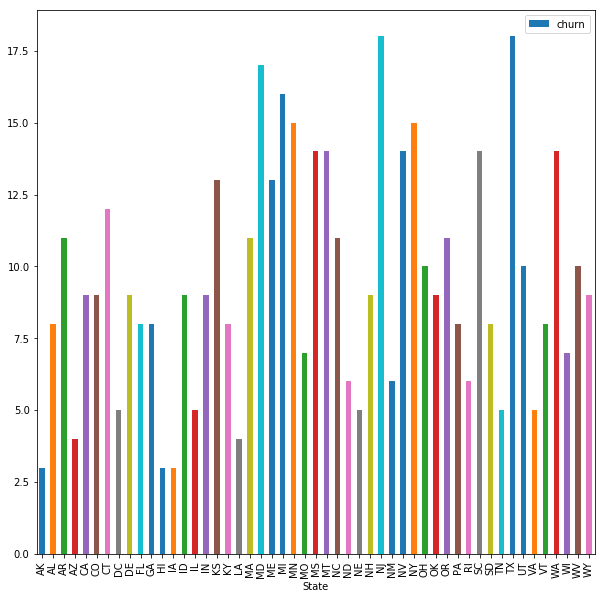

In [10]:
state_df= churn_df[['State','churn']].groupby(['State'], as_index=False).sum()
state_df.plot.bar(x='State',y = 'churn',figsize= (10,10))

In [11]:
state_df.sort_values(by=['churn'], ascending=False)
#doesn't look like there is a relationship between state and # of people who churned

,State,churn
31,NJ,18
43,TX,18
20,MD,17
22,MI,16
23,MN,15
34,NY,15
26,MT,14
33,NV,14
25,MS,14
40,SC,14


# Customer Service call counts

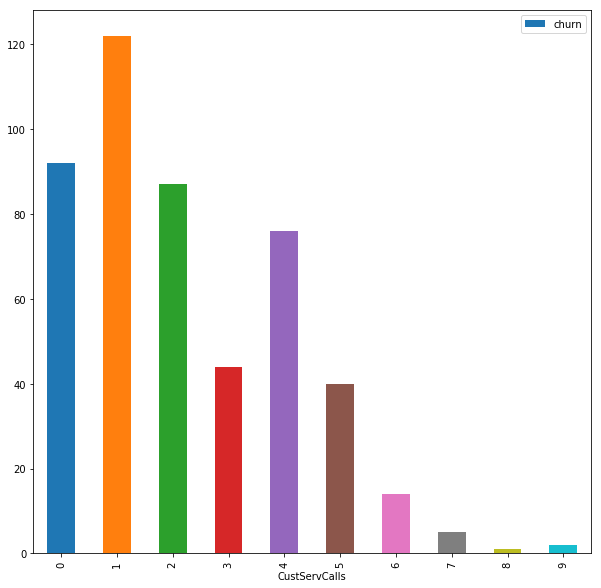

In [12]:
custserv_df= churn_df[['CustServCalls','churn']].groupby(['CustServCalls'], as_index=False).sum()
custserv_df
custserv_df.plot.bar(x = 'CustServCalls', y = 'churn',figsize=(10,10) )

# International Plan counts

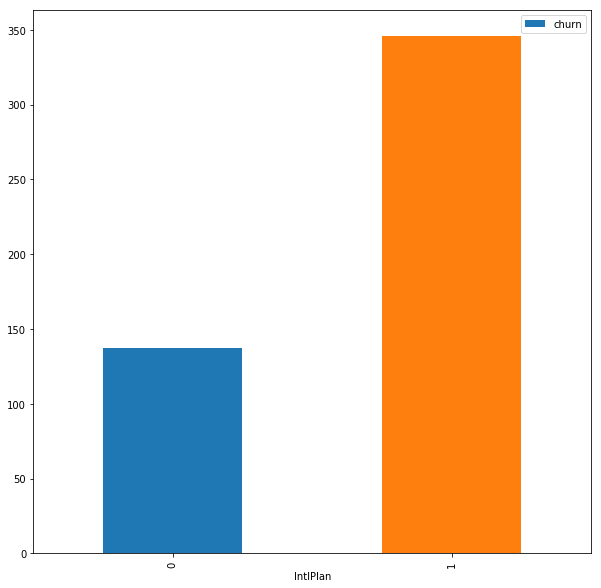

In [13]:
IntlPlan_df= churn_df[['IntlPlan','churn']].groupby(['IntlPlan'], as_index=False).sum()
IntlPlan_df.plot.bar(x= 'IntlPlan', y = 'churn', figsize = (10,10))

In [14]:
#total % of churn

total_churn = custserv_df['churn'].sum()
total_churn

483

In [15]:
custserv_df.sort_values(by=['churn'], ascending=False)

,CustServCalls,churn
1,1,122
0,0,92
2,2,87
4,4,76
3,3,44
5,5,40
6,6,14
7,7,5
9,9,2
8,8,1


In [16]:
for i in custserv_df['churn']:
    churn_percentage = pd.DataFrame(np.array([(i/total_churn)]))
    print(churn_percentage)

          0
0  0.190476
          0
0  0.252588
          0
0  0.180124
          0
0  0.091097
         0
0  0.15735
          0
0  0.082816
          0
0  0.028986
          0
0  0.010352
         0
0  0.00207
          0
0  0.004141


19% of churn customers do not log a support call
25% of churn customer log 1 support call
18% of churn customer log 2 support calls

60% of customers log 0 - 2 support calls

Next step is to investigate minutes usage. Daytime charges have the highest max and median charges

# Day Charge counts

In [17]:
daycharge_df = churn_df[['DayCharge','churn']].groupby(['DayCharge'], as_index=False).sum()
daycharge_df.sort_values(by=['churn'], ascending=False)

,DayCharge,churn
1594,48.81,2
714,28.41,2
1352,41.17,2
1642,53.04,2
1458,44.10,2
1401,42.47,2
1633,51.66,2
1525,46.09,2
1402,42.48,2
1442,43.59,2


# Classification

We will now select the columns for traning our Churn classifier

In [19]:
churn_df.columns

Index(['State', 'AccountLength', 'AreaCode', 'Phone', 'IntlPlan', 'VMailPlan',
       'VMailMessage', 'DayMins', 'DayCalls', 'DayCharge', 'EveMins',
       'EveCalls', 'EveCharge', 'NightMins', 'NightCalls', 'NightCharge',
       'IntlMins', 'IntlCalls', 'IntlCharge', 'CustServCalls', 'Churn',
       'churn', 'StateCategory'],
      dtype='object')

In [42]:
#churn_df_class = churn_df[['CustServCalls','IntlPlan','DayCharge','DayMins',
#                           'DayCalls','IntlMins','IntlCalls','IntlCharge','VMailPlan',
#                          'VMailMessage','StateCategory','AccountLength',
#                           'EveCalls', 'EveCharge', 'NightMins', 'NightCalls', 'NightCharge',
#                           'churn']]

churn_df_class  = churn_df.drop(["Phone", "AreaCode", "State","StateCategory","Churn"], axis=1)


In [43]:
churn_df_class.head()

,AccountLength,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,churn
0,128,1,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,1,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,0,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Initializing classifiers and divide the to train/test(validation)


In [156]:
#Initialize Various Classifiers
clf = GaussianNB()
clf_tree = tree.DecisionTreeClassifier()
clf_KNN = KNeighborsClassifier()
clf_SVM = svm.SVC()
clf_randomforest = RandomForestClassifier()
# Split-out validation dataset
array = churn_df_class.values
X = array[:,0:17] # Features/Independent Variables
Y = array[:,17] # Response/Class Variable

#Sacling the features to have the same magnitude 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-third of data as a part of test set
validation_size = 0.10

seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

#X_train_scale = scaler.fit_transform(X_train)
#X_validation_scale = scaler.fit_transform(X_validation)

#X_train_transform = scaler.transform(X_train_scale)
#X_validation_transform = scaler.transform(X_validation_scale)

train_size = len(X_train)
val_size = len(X_validation)
print(val_size)
print(train_size)

334
2999


## Performance Evaluation and Model Selection Using Cross Validation

In [157]:
# Test options and evaluation metric
scoring = 'accuracy'

#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
cv_results_nb = model_selection.cross_val_score(GaussianNB(),X_train, Y_train, cv=kfold, scoring=scoring)
cv_results_tree = model_selection.cross_val_score(tree.DecisionTreeClassifier(),X_train, Y_train, cv=kfold, scoring=scoring)
cv_results_knn = model_selection.cross_val_score(KNeighborsClassifier(),X_train, Y_train, cv=kfold, scoring=scoring)
cv_results_svm = model_selection.cross_val_score(svm.SVC(),X_train, Y_train, cv=kfold, scoring=scoring)
cv_results_random = model_selection.cross_val_score(RandomForestClassifier(),X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results_nb.mean(), cv_results_nb.std())
msg2 = "%s: %f (%f)" % ('Tree accuracy', cv_results_tree.mean(), cv_results_tree.std())
msg3 = "%s: %f (%f)" % ('KNN accuracy', cv_results_knn.mean(), cv_results_knn.std())
msg4 = "%s: %f (%f)" % ('SVM accuracy', cv_results_svm.mean(), cv_results_svm.std())
msg5 = "%s: %f (%f)" % ('Random Forest accuracy', cv_results_random.mean(), cv_results_random.std())

print(msg)
print(msg2)
print(msg3)
print(msg4)
print(msg5)


NB accuracy: 0.862292 (0.018289)
Tree accuracy: 0.913971 (0.009524)
KNN accuracy: 0.895304 (0.016447)
SVM accuracy: 0.921309 (0.017644)
Random Forest accuracy: 0.943313 (0.010961)


### Setting up classifier parameters, evaluation metric, and train and test (validate) it using the classifier that gives us the highest accuracy

In [158]:

#Fitting the training set on RandomForest
clf_randomforest.fit(X_train,Y_train)

#Predicting for the Test(Validation) Set
pred_randomforest = clf_randomforest.predict(X_validation)
probs = clf_randomforest.predict_proba(X_validation)

In [159]:
report = classification_report(Y_validation,pred_randomforest)
print(report)

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97       283
        1.0       0.93      0.76      0.84        51

avg / total       0.95      0.96      0.95       334



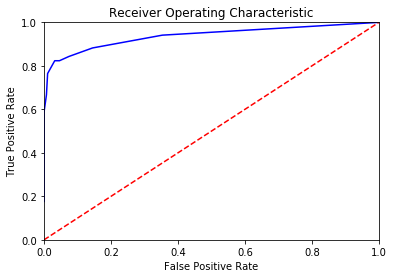

,Predicted False,Predicted True
Actual False,280,3
Actual True,12,39


In [161]:


# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(Y_validation, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(Y_validation, pred_randomforest), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)
